In [33]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

In [34]:
def process_file(file_path):
    #Read the specific column (C) and rows (3 to 5), with no header's 
    head = pd.read_excel(file_path, usecols="C", nrows=5, header=None)
    #Remove the head. iloc, (double point and two spaces) from each cell 
    head.iloc[:, 0] = head.iloc[:, 0].str.replace(": ", "", regex=False)
    
    station_id = head.iloc[0, 0] #ID as text station name head.lloc(1, 0) Nome as text
    station_name = head.iloc[1, 0] #ID as text station name head.lloc(1, 0) Nome as text
    latitude = float(head. iloc [2, 0]) #Latitude as a number
    longitude = float (head.iloc[3, 0]) 
    elevation = float (head. iloc[4, 0]) 
    
    #Read data starting from now 9 without Limiting the number of rous 
    data = pd.read_excel(file_path, usecols="A:K", skiprows=8)
    #Find the index of the row containing "Keterangan:"
    keterangan_index = data [data.iloc[:, 0].str.contains("Keterangan :", na=False)].index
    if not keterangan_index.empty: 
        last_row_index = keterangan_index[0] - 4 # rows before the "Keterangan row 
        relevant_data = data.loc[:last_row_index]
    else:
        relevant_data = data #If "Keterangan Es not found, use all data
    #Transpose the data
    data_transposed = relevant_data.T
    #Extract the header from now 1 (Sodes & after transposition)
    headers = data_transposed.iloc[0].values 
    #Extract the favy data fron row 4 (Index 3 after transposition) 
    RR_data = data_transposed.iloc[5].values
    #create a dataFrame
    rh_df = pd.DataFrame([RR_data], columns=headers)
    
    metadata = {
        'station_id': [station_id],
        'station_name': [station_name],
        'latitude': [latitude],
        'longitude': [longitude],
        'elevation': [elevation]
    }
    metadata_df = pd.DataFrame(metadata)
    #Combine metadata with Tavg data
    combined_data = pd.concat([metadata_df, rh_df], axis=1)
    
    return combined_data
#Example usage with file path
#combined data process file('path_to_your_file.xlsx')


In [35]:
file_pattern = 'data_kalimantan/laporan_iklim_harian*.xlsx'
files = glob.glob(file_pattern)
#Initialize an empty List to hold DataFrames
all_data = []

# Process each file and append the DataFrame to the list
for file in files:
    df = process_file(file)
    all_data.append(df)

final_combined_data = pd.concat(all_data, ignore_index=True)

print(final_combined_data)

   station_id                                       station_name  latitude  \
0       96615                  Stasiun Meteorologi Rahadi Oesman  -1.80000   
1       96645                       Stasiun Meteorologi Iskandar  -2.73000   
2       96651                        Stasiun Meteorologi H. Asan  -2.55000   
3       96653                         Stasiun Meteorologi Sanggu  -1.67000   
4       96595                       Stasiun Meteorologi Beringin  -0.56000   
5       96655                   Stasiun Meteorologi Tjilik Riwut  -2.22000   
6       96529                     Stasiun Meteorologi Kalimarau    2.14562   
7       96633   Stasiun Meteorologi Sultan Aji Muhammad Sulai...  -1.26000   
8       96635                       Stasiun Geofisika Balikpapan  -1.25530   
9       96607   Stasiun Meteorologi Aji Pangeran Tumenggung P...  -0.48000   
10      96525                Stasiun Meteorologi Tanjung Harapan   2.50000   
11      96559                       Stasiun Meteorologi Tebelian

In [36]:
final_combined_data.replace([8888, 9999], np.nan, inplace=True)

In [37]:
print(final_combined_data)

   station_id                                       station_name  latitude  \
0       96615                  Stasiun Meteorologi Rahadi Oesman  -1.80000   
1       96645                       Stasiun Meteorologi Iskandar  -2.73000   
2       96651                        Stasiun Meteorologi H. Asan  -2.55000   
3       96653                         Stasiun Meteorologi Sanggu  -1.67000   
4       96595                       Stasiun Meteorologi Beringin  -0.56000   
5       96655                   Stasiun Meteorologi Tjilik Riwut  -2.22000   
6       96529                     Stasiun Meteorologi Kalimarau    2.14562   
7       96633   Stasiun Meteorologi Sultan Aji Muhammad Sulai...  -1.26000   
8       96635                       Stasiun Geofisika Balikpapan  -1.25530   
9       96607   Stasiun Meteorologi Aji Pangeran Tumenggung P...  -0.48000   
10      96525                Stasiun Meteorologi Tanjung Harapan   2.50000   
11      96559                       Stasiun Meteorologi Tebelian

In [38]:
final_combined_data = final_combined_data.ffill()

In [39]:
output_file = 'data_kalimantan/hasil_curah_hujan.xlsx'
final_combined_data.to_excel(output_file, index=False)

In [40]:
file_path ='data_kalimantan/hasil_curah_hujan.xlsx'
df = pd.read_excel(file_path)

C:\Users\Syawal\AppData\Local\Temp\ipykernel_2936\500656952.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df_transposed.resample('M').mean()


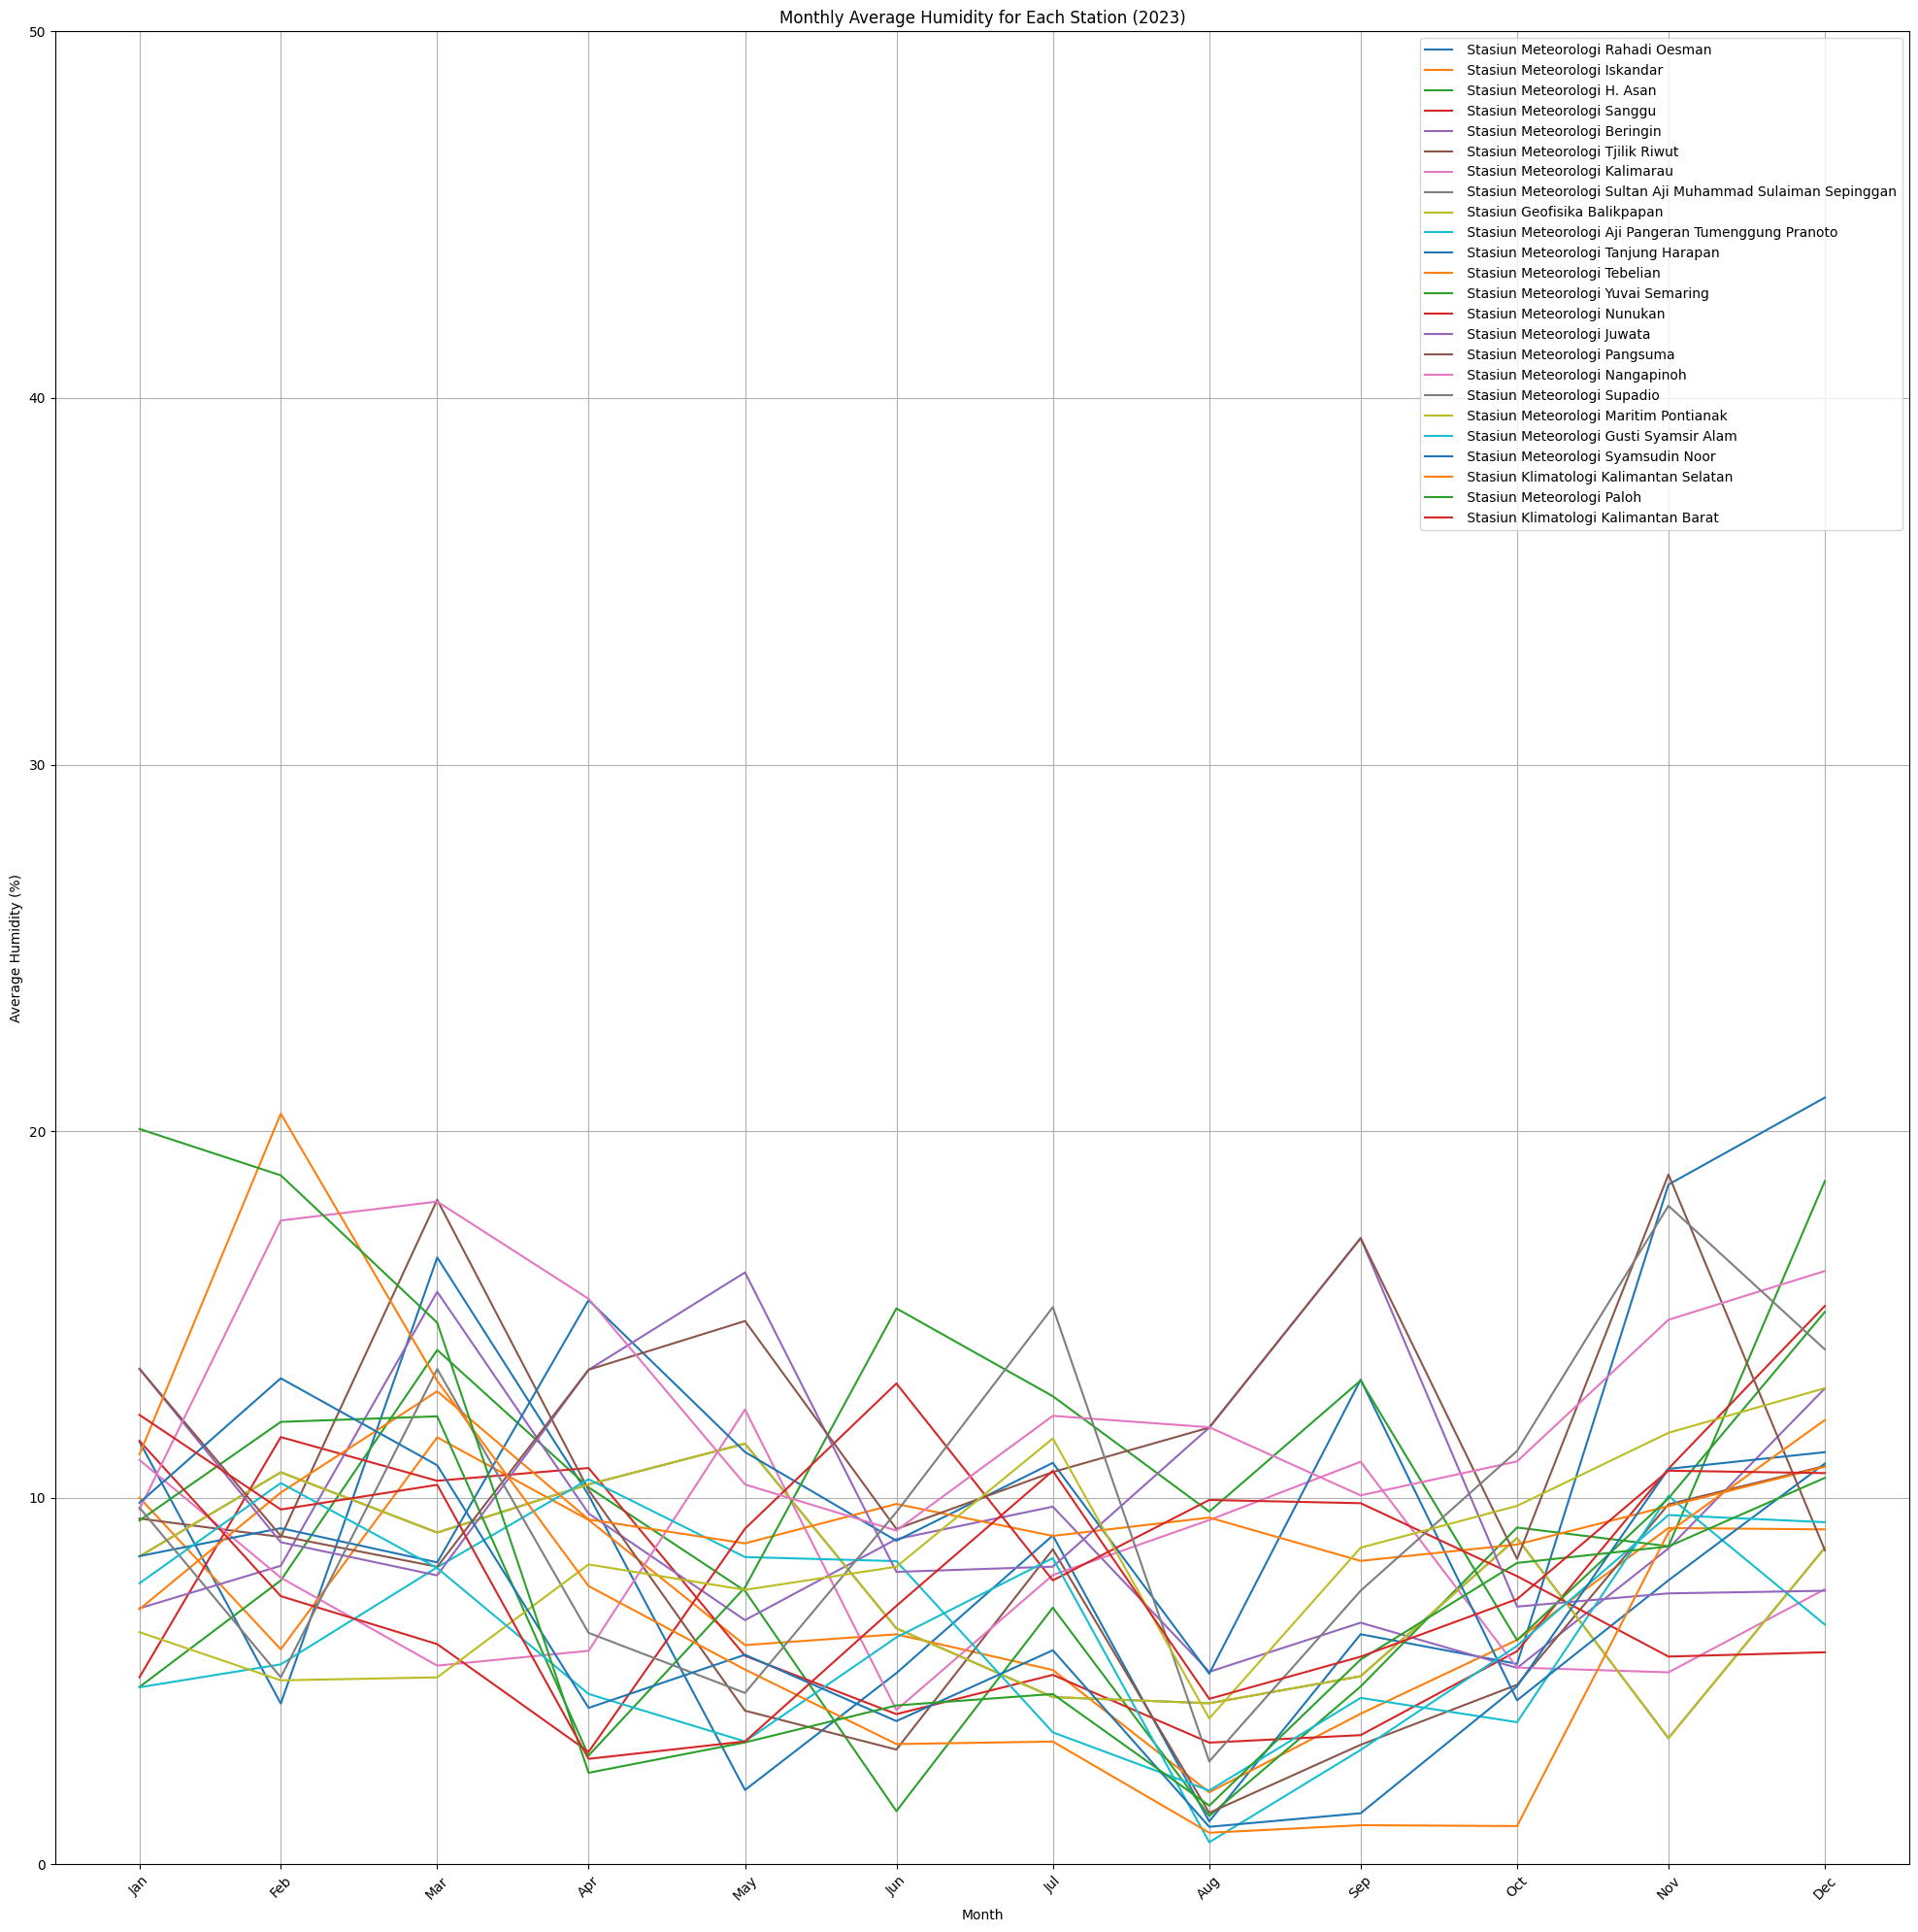

In [41]:
# Transpose the data to have dates as rows
df_transposed = df.iloc[:, 5:].T
df_transposed.columns = df['station_name']

# Convert the index (date strings) to datetime format
df_transposed.index = pd.to_datetime(df_transposed.index, format='%d-%m-%Y')

# Resample the data by month to calculate the monthly mean
monthly_avg = df_transposed.resample('M').mean()

# Plot the monthly average for each station
plt.figure(figsize=(20, 20))
for station in monthly_avg.columns:
    plt.plot(monthly_avg.index, monthly_avg[station], label=station)

plt.title('Monthly Average Humidity for Each Station (2023)')
plt.xlabel('Month')
plt.ylabel('Average Humidity (%)')  # Change the label to humidity
plt.legend()
plt.xticks(monthly_avg.index, monthly_avg.index.strftime('%b'), rotation=45)
plt.grid(True)
plt.tight_layout()
plt.ylim(0, 50)

# Show the plot
plt.show()

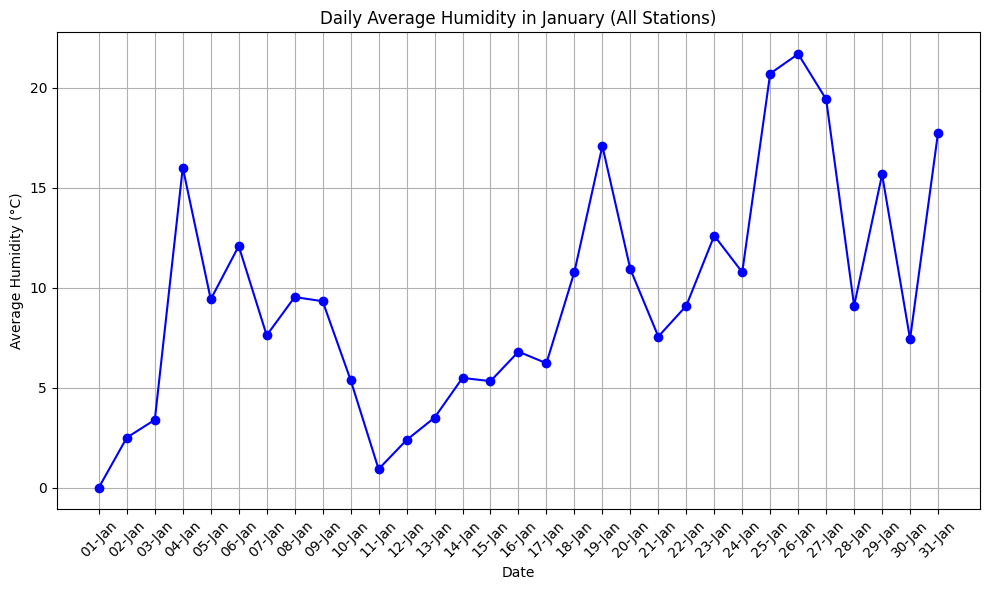

In [42]:
# Calculate the daily mean for all stations combined
daily_avg = df_transposed.mean(axis=1)

# Filter the data for the month of January
january_avg = daily_avg[daily_avg.index.month == 1]

# Plot the daily average for January
plt.figure(figsize=(10, 6))
plt.plot(january_avg.index, january_avg, label='Average Humidity (All Stations)', 
         marker='o', color='b')

plt.title('Daily Average Humidity in January (All Stations)')
plt.xlabel('Date')
plt.ylabel('Average Humidity (°C)')
plt.xticks(january_avg.index, january_avg.index.strftime('%d-%b'), rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


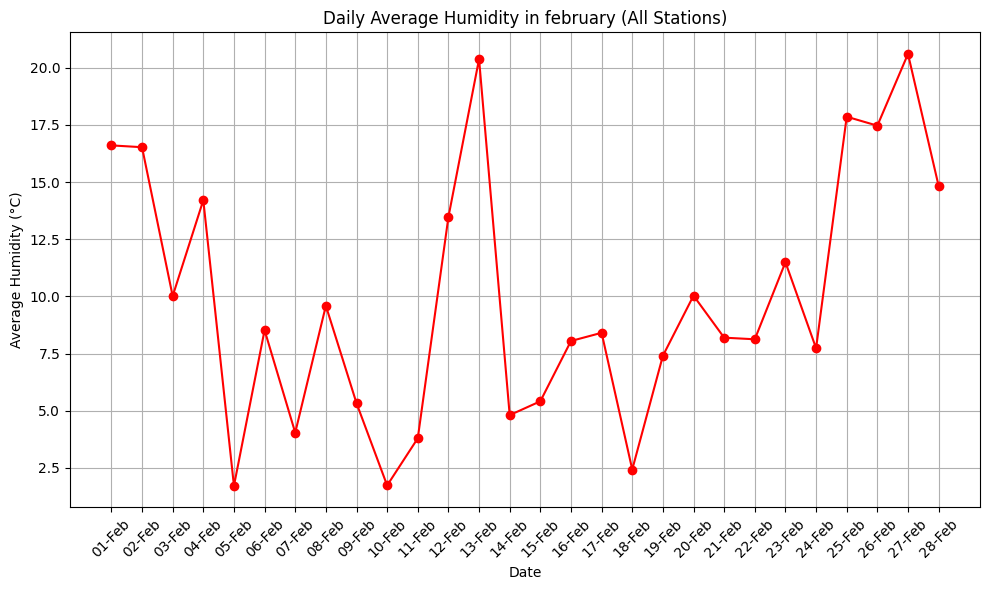

In [43]:
# Calculate the daily mean for all stations combined
daily_avg = df_transposed.mean(axis=1)

# Filter the data for the month of January
february_avg = daily_avg[daily_avg.index.month == 2]

# Plot the daily average for January
plt.figure(figsize=(10, 6))
plt.plot(february_avg.index, february_avg, label='Average Humidity (All Stations)', marker='o',color='r')

plt.title('Daily Average Humidity in february (All Stations)')
plt.xlabel('Date')
plt.ylabel('Average Humidity (°C)')
plt.xticks(february_avg.index, february_avg.index.strftime('%d-%b'), rotation=45)

plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


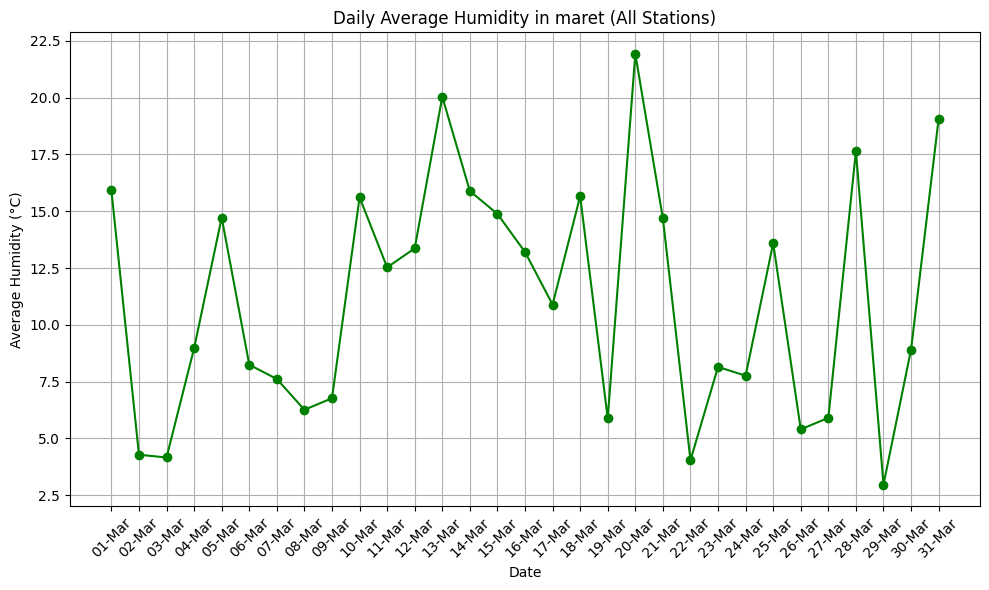

In [44]:
# Calculate the daily mean for all stations combined
daily_avg = df_transposed.mean(axis=1)

# Filter the data for the month of January
maret_avg = daily_avg[daily_avg.index.month == 3]

# Plot the daily average for maret
plt.figure(figsize=(10, 6))
plt.plot(maret_avg.index, maret_avg, label='Average Humidity (All Stations)', color='g', marker='o')

plt.title('Daily Average Humidity in maret (All Stations)')
plt.xlabel('Date')
plt.ylabel('Average Humidity (°C)')
plt.xticks(maret_avg.index, maret_avg.index.strftime('%d-%b'), rotation=45)

plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


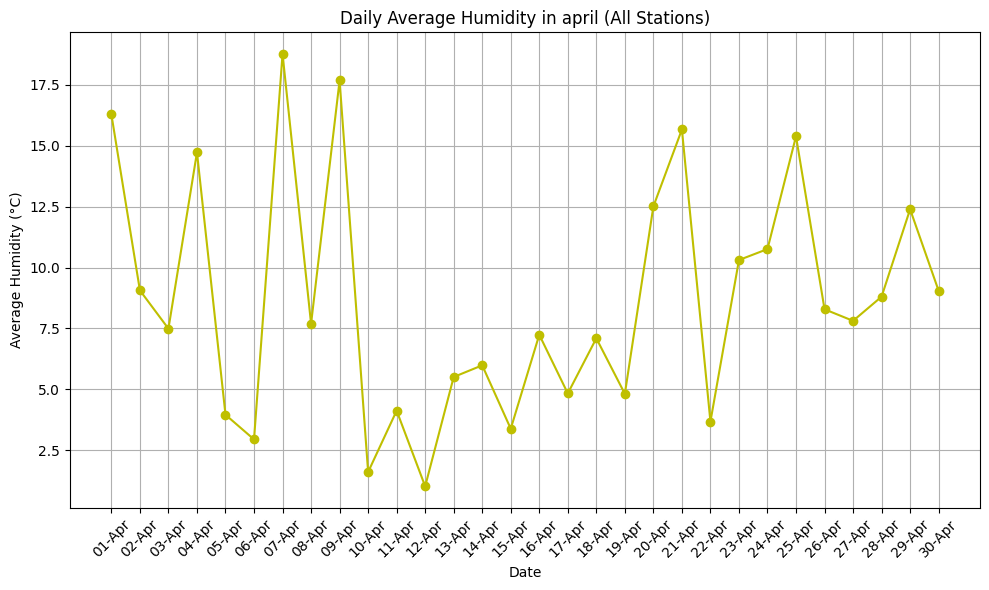

In [45]:
# Calculate the daily mean for all stations combined
daily_avg = df_transposed.mean(axis=1)

# Filter the data for the month of January
april_avg = daily_avg[daily_avg.index.month == 4]

# Plot the daily average for april
plt.figure(figsize=(10, 6))
plt.plot(april_avg.index, april_avg, label='Average Humidity (All Stations)', color='y', marker='o')

plt.title('Daily Average Humidity in april (All Stations)')
plt.xlabel('Date')
plt.ylabel('Average Humidity (°C)')
plt.xticks(april_avg.index, april_avg.index.strftime('%d-%b'), rotation=45)
plt.grid(True)

plt.tight_layout()

# Show the plot
plt.show()


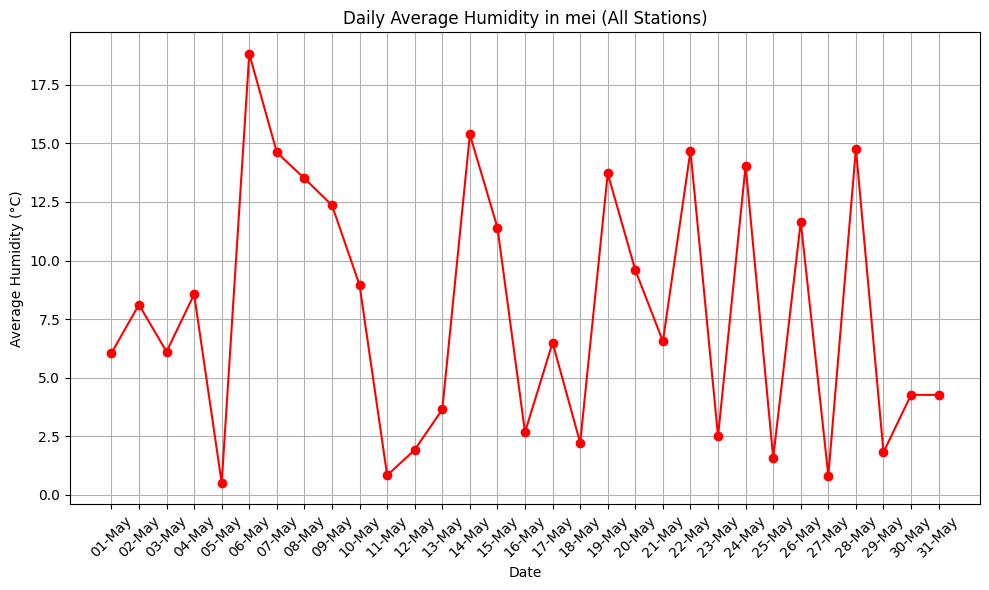

In [46]:
# Calculate the daily mean for all stations combined
daily_avg = df_transposed.mean(axis=1)

# Filter the data for the month of January
mei_avg = daily_avg[daily_avg.index.month == 5]

# Plot the daily average for mei
plt.figure(figsize=(10, 6))
plt.plot(mei_avg.index, mei_avg, label='Average Humidity (All Stations)', color='r', marker='o')

plt.title('Daily Average Humidity in mei (All Stations)')
plt.xlabel('Date')
plt.ylabel('Average Humidity (°C)')
plt.xticks(mei_avg.index, mei_avg.index.strftime('%d-%b'), rotation=45)
plt.grid(True)

plt.tight_layout()

# Show the plot
plt.show()


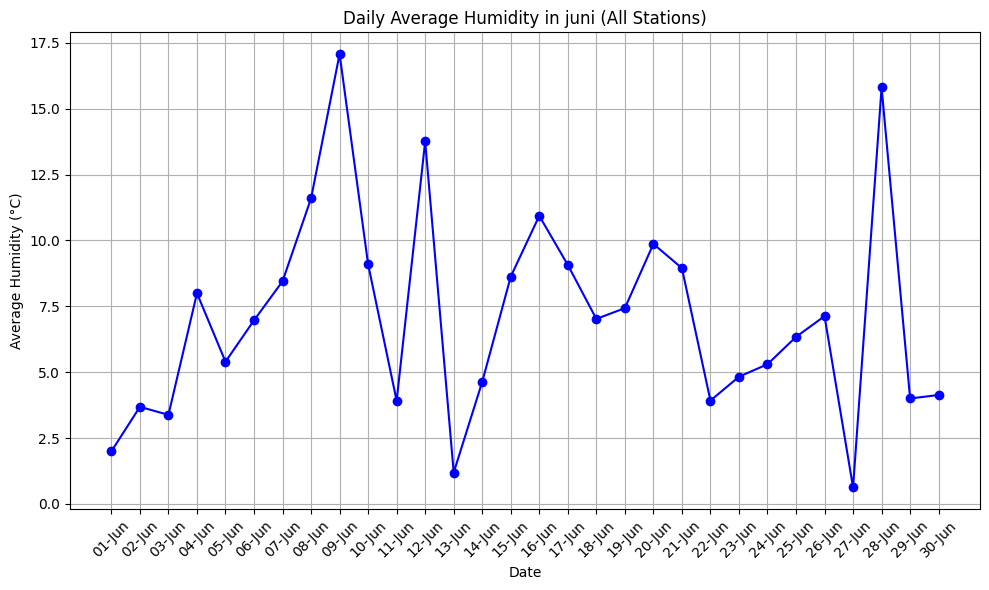

In [47]:
# Calculate the daily mean for all stations combined
daily_avg = df_transposed.mean(axis=1)

# Filter the data for the month of January
juni_avg = daily_avg[daily_avg.index.month == 6]

# Plot the daily average for juni
plt.figure(figsize=(10, 6))
plt.plot(juni_avg.index, juni_avg, label='Average Humidity (All Stations)', color='b', marker='o')

plt.title('Daily Average Humidity in juni (All Stations)')
plt.xlabel('Date')
plt.ylabel('Average Humidity (°C)')
plt.xticks(juni_avg.index, juni_avg.index.strftime('%d-%b'), rotation=45)
plt.grid(True)

plt.tight_layout()

# Show the plot
plt.show()


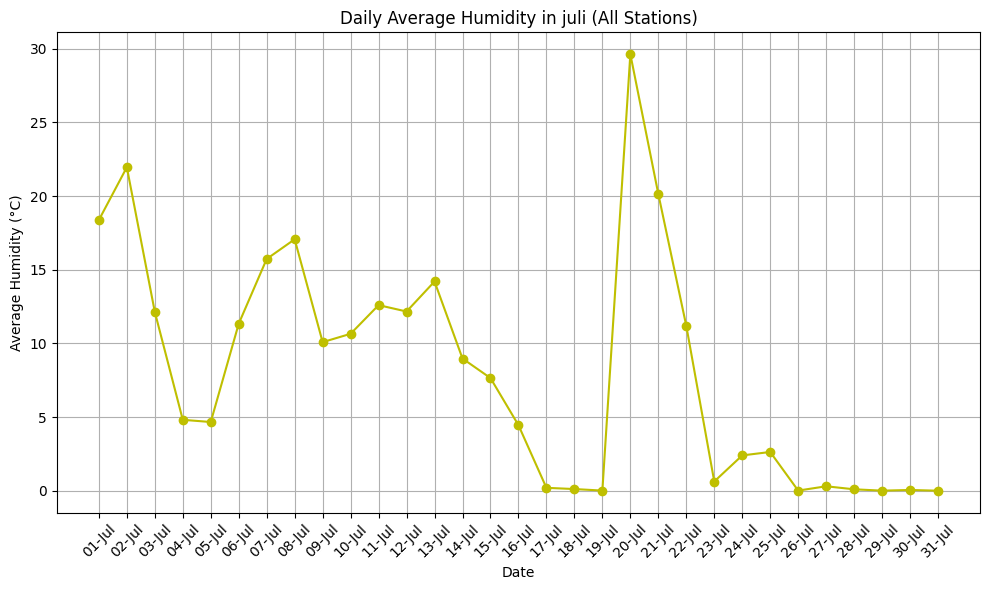

In [48]:
# Calculate the daily mean for all stations combined
daily_avg = df_transposed.mean(axis=1)

# Filter the data for the month of January
juli_avg = daily_avg[daily_avg.index.month == 7]

# Plot the daily average for juli
plt.figure(figsize=(10, 6))
plt.plot(juli_avg.index, juli_avg, label='Average Humidity (All Stations)', color='y', marker='o')

plt.title('Daily Average Humidity in juli (All Stations)')
plt.xlabel('Date')
plt.ylabel('Average Humidity (°C)')
plt.xticks(juli_avg.index, juli_avg.index.strftime('%d-%b'), rotation=45)
plt.grid(True)

plt.tight_layout()

# Show the plot
plt.show()


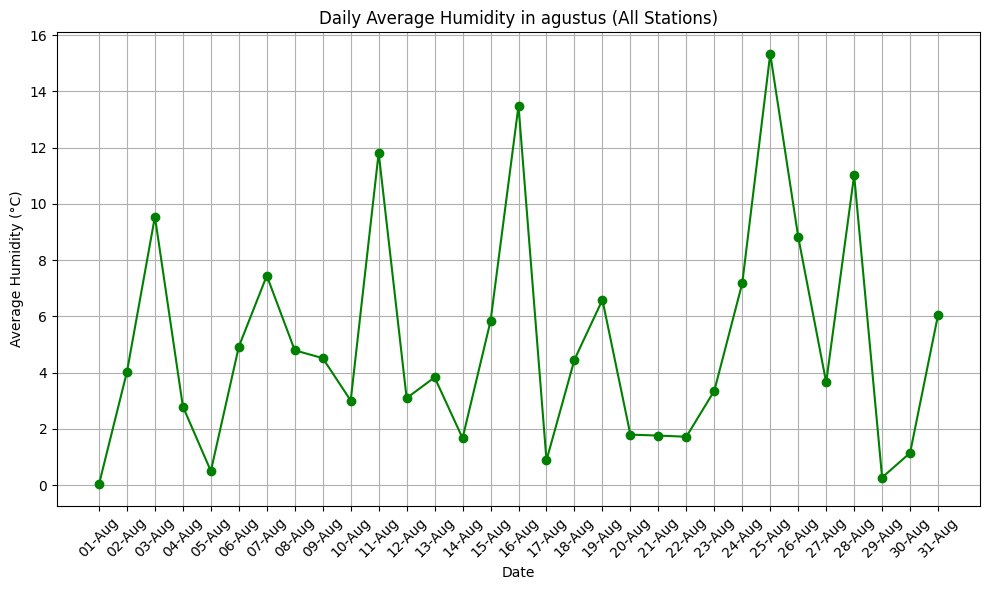

In [49]:
# Calculate the daily mean for all stations combined
daily_avg = df_transposed.mean(axis=1)

# Filter the data for the month of January
agustus_avg = daily_avg[daily_avg.index.month == 8]

# Plot the daily average for agustus
plt.figure(figsize=(10, 6))
plt.plot(agustus_avg.index, agustus_avg, label='Average Humidity (All Stations)', color='g', marker='o')

plt.title('Daily Average Humidity in agustus (All Stations)')
plt.xlabel('Date')
plt.ylabel('Average Humidity (°C)')
plt.xticks(agustus_avg.index, agustus_avg.index.strftime('%d-%b'), rotation=45)
plt.grid(True)

plt.tight_layout()

# Show the plot
plt.show()


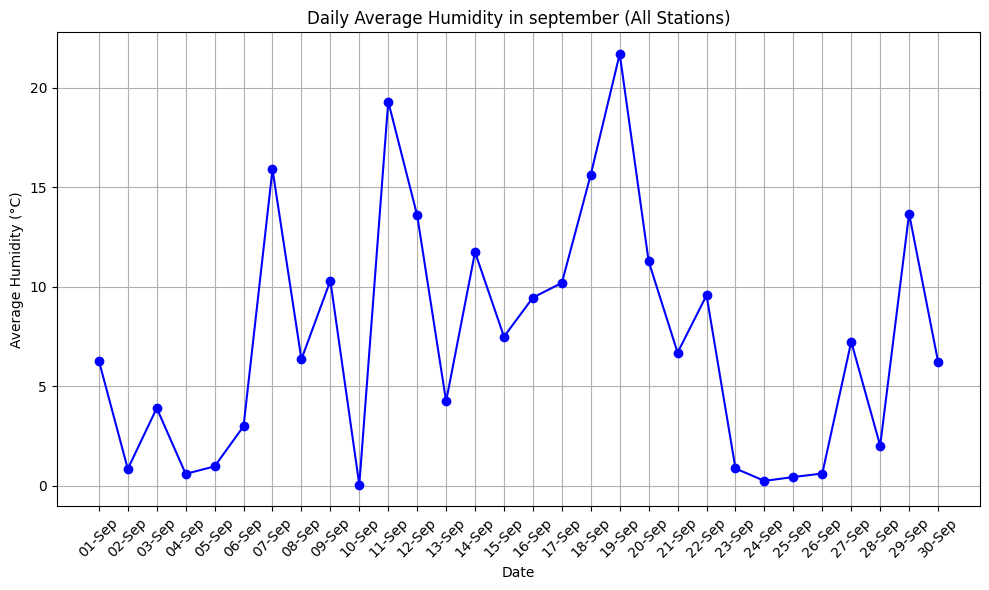

In [50]:
# Calculate the daily mean for all stations combined
daily_avg = df_transposed.mean(axis=1)

# Filter the data for the month of January
september_avg = daily_avg[daily_avg.index.month == 9]

# Plot the daily average for september
plt.figure(figsize=(10, 6))
plt.plot(september_avg.index, september_avg, label='Average Humidity (All Stations)', color='b', marker='o')

plt.title('Daily Average Humidity in september (All Stations)')
plt.xlabel('Date')
plt.ylabel('Average Humidity (°C)')
plt.xticks(september_avg.index, september_avg.index.strftime('%d-%b'), rotation=45)
plt.grid(True)

plt.tight_layout()

# Show the plot
plt.show()


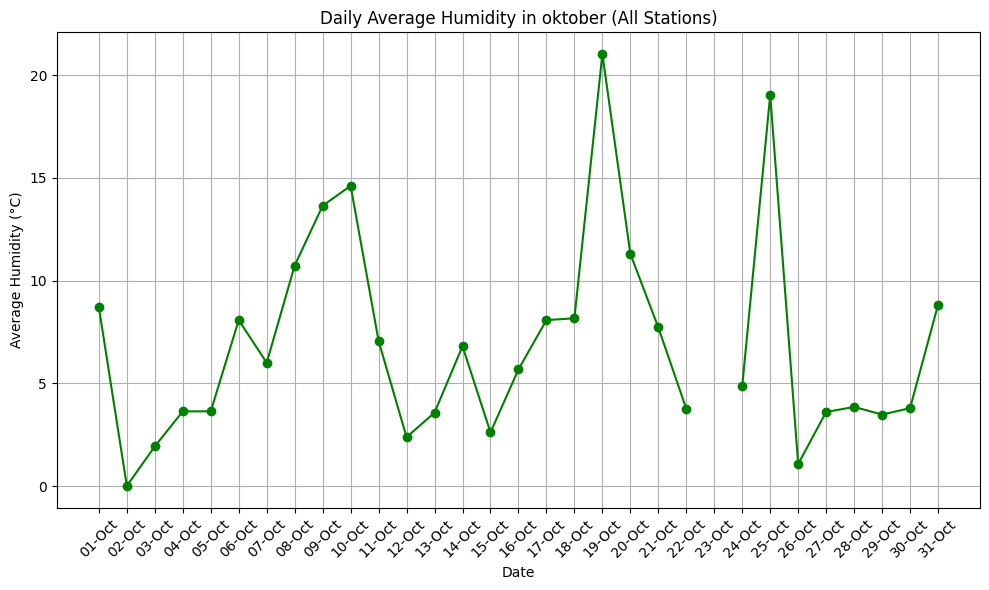

In [51]:
# Calculate the daily mean for all stations combined
daily_avg = df_transposed.mean(axis=1)

# Filter the data for the month of January
oktober_avg = daily_avg[daily_avg.index.month == 10]

# Plot the daily average for oktober
plt.figure(figsize=(10, 6))
plt.plot(oktober_avg.index, oktober_avg, label='Average Humidity (All Stations)', color='g', marker='o')

plt.title('Daily Average Humidity in oktober (All Stations)')
plt.xlabel('Date')
plt.ylabel('Average Humidity (°C)')
plt.xticks(oktober_avg.index, oktober_avg.index.strftime('%d-%b'), rotation=45)
plt.grid(True)

plt.tight_layout()

# Show the plot
plt.show()


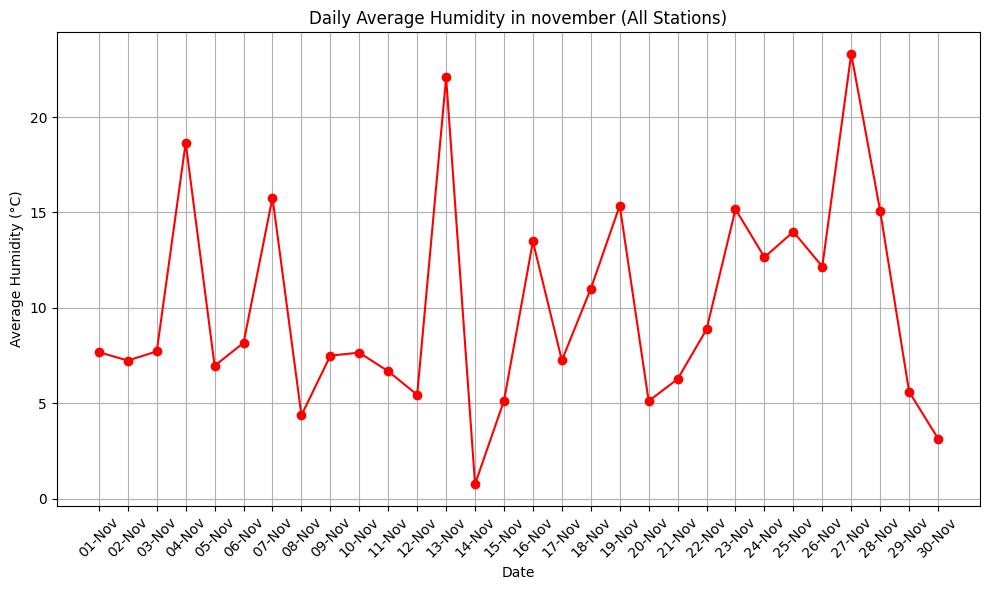

In [52]:
# Calculate the daily mean for all stations combined
daily_avg = df_transposed.mean(axis=1)

# Filter the data for the month of January
november_avg = daily_avg[daily_avg.index.month == 11]

# Plot the daily average for november
plt.figure(figsize=(10, 6))
plt.plot(november_avg.index, november_avg, label='Average Humidity (All Stations)', color='r', marker='o')

plt.title('Daily Average Humidity in november (All Stations)')
plt.xlabel('Date')
plt.ylabel('Average Humidity (°C)')
plt.xticks(november_avg.index, november_avg.index.strftime('%d-%b'), rotation=45)
plt.grid(True)

plt.tight_layout()

# Show the plot
plt.show()


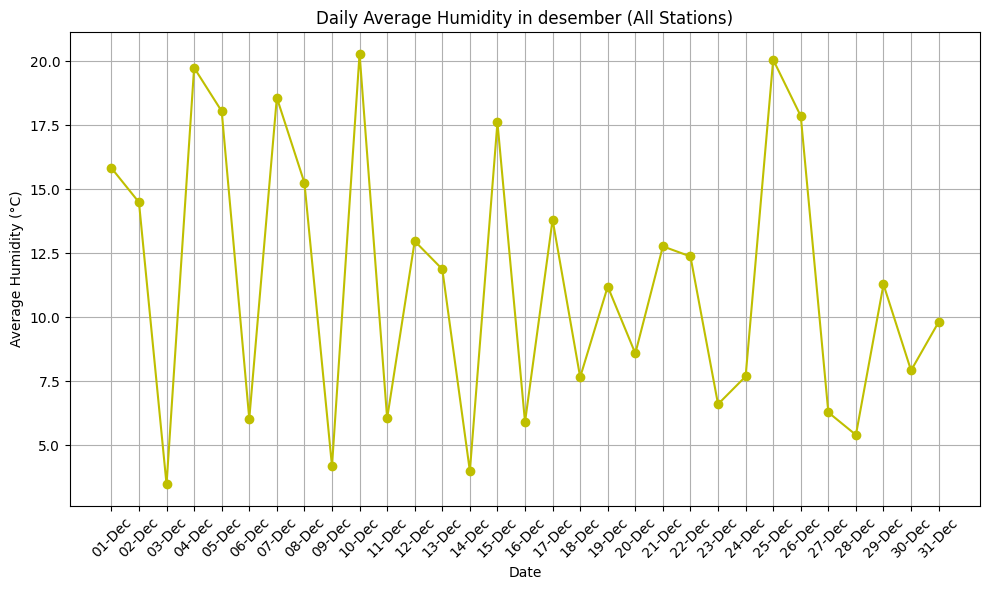

In [53]:
# Calculate the daily mean for all stations combined
daily_avg = df_transposed.mean(axis=1)

# Filter the data for the month of January
desember_avg = daily_avg[daily_avg.index.month == 12]

# Plot the daily average for desember
plt.figure(figsize=(10, 6))
plt.plot(desember_avg.index, desember_avg, label='Average Humidity (All Stations)', color='y', marker='o')

plt.title('Daily Average Humidity in desember (All Stations)')
plt.xlabel('Date')
plt.ylabel('Average Humidity (°C)')
plt.xticks(desember_avg.index, desember_avg.index.strftime('%d-%b'), rotation=45)
plt.grid(True)

plt.tight_layout()

# Show the plot
plt.show()
